In these files, we'll learn another skill that's not directly related to data analysis but can be a helpful adjacent skill: how to use the Shiny package.

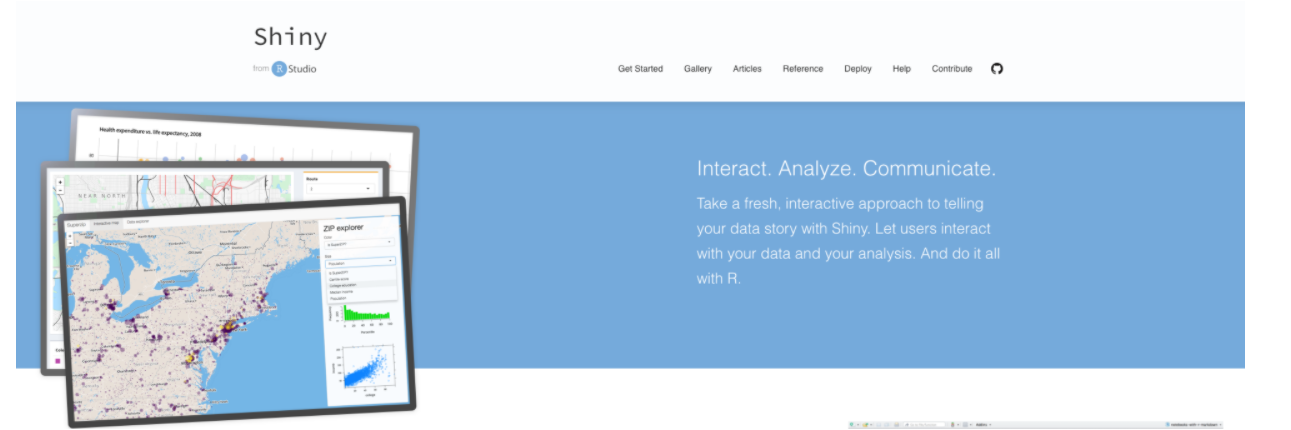

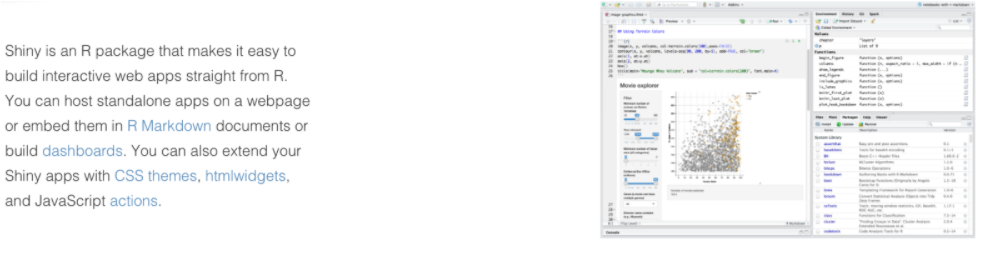

The [`shiny` package](https://shiny.rstudio.com/) allows R programmers to create **interactive web apps**. A web app (short for "web application") is software that we use in an internet browser. If we've ever watched Netflix on our laptop or called a ride with Uber, then we've interacted with a web application. 

This package is especially impressive because R was originally designed as a statistical programming language! The RStudio site has compiled many great examples of what Shiny can do in their [gallery](https://shiny.rstudio.com/gallery/).

Developing a web application in Shiny will be an entirely different experience than we've had with us so far, but knowing how to do this will make us a skilled programmer and analyst. As we will learn throughout, we can create web apps that perform a great variety of tasks. We won't be making the next Netflix or Uber, but we'll at least equip with the fundamental ideas that will help us turn our project ideas into products that others (and future employers) can interact with directly.

In these files, we'll learn enough Shiny to build two apps. We'll walk through the **first app**, a **data dashboard**, to learn some fundamental concepts about building an app. The **second app**, a **project portfolio** and it will showcase all the projects we've done.

Given the stark change in programming we're about to undertake, we need to structure our Shiny files slightly differently than out previous ones. Shiny programming is different from the programming we've done so far, so we won't be able to write code directly in the console. 

For these files, we'll learn Shiny through a series of pictures and text, and we'll create code in our own **RStudio**. 

For now, we'll dedicate this file to introducing Shiny and some concepts that will be important as we slowly build up our first app.

Before we can start using Shiny, we need to make sure it's on our machines! In our RStudio, use the `install.packages()` function to install the Shiny package:

`install.packages("shiny")`

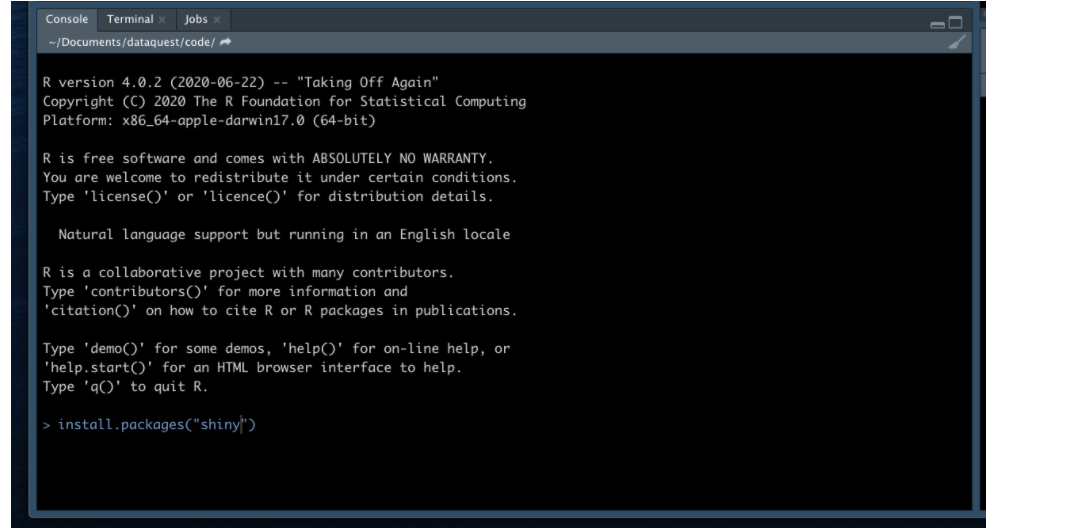

Note the capitalization of the Shiny package. When talking about the package in general text, Shiny is usually in an uppercase. However, when we use it as a package inside of R, we need to type it using lowercase letters (i.e., `library(shiny)`, not `library(Shiny)`). When we try to install it or load it in, make sure that we use the all lowercase version.

As of the writing of this file, `shiny` is currently at version `1.5.0`. If we take this at a later date, the version may have updated since then. Most changes are small across different versions, but we will make sure to update when there are major updates to the `shiny` package.

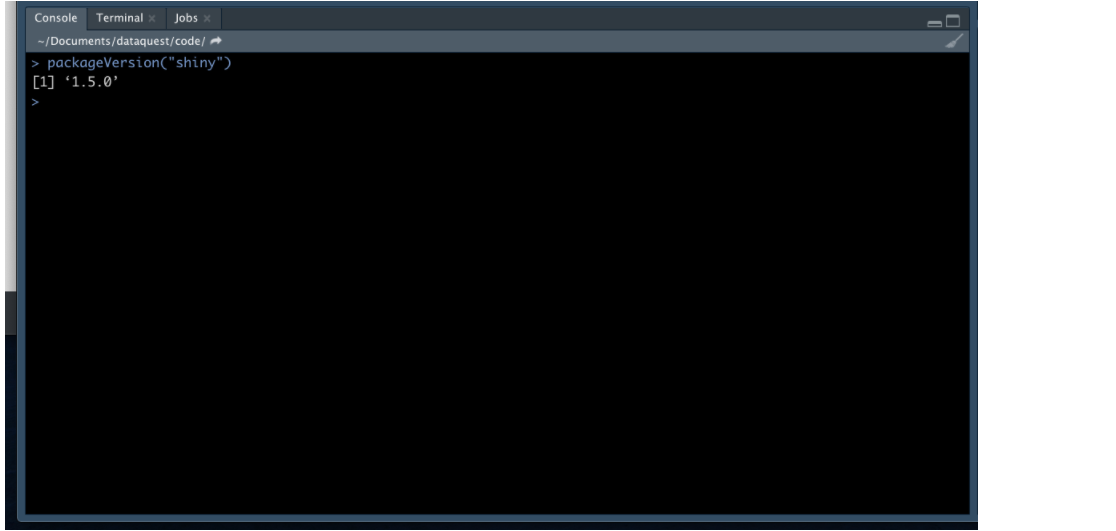

Once we have `shiny` on our machine, we'll start seeing how some Shiny-specific code looks!

[`RStudio`](https://rstudio.com/) makes it convenient to get started working on an app. If we click on the new file button in the top left corner of the RStudio window, we can see that one of the filetypes that we can open is a "Shiny Web App."

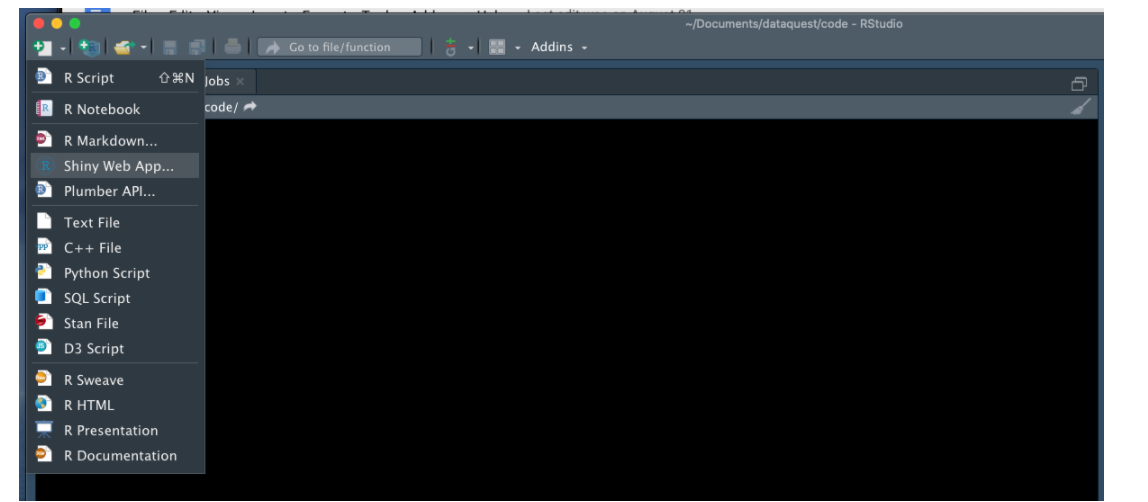

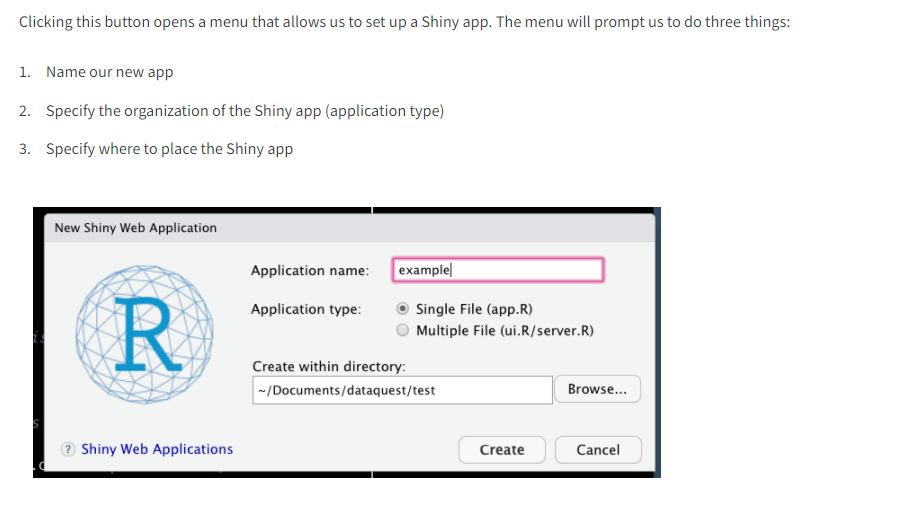

For now, the specifics don't matter, so we'll just call the app `example`. When we create a Shiny app, Rstudio creates a new folder that contains all of the files associated with the app. This folder goes into the directory that we specify in step three). In this case, a folder called `example` will open in the directory `/Documents/dataquest/test`.

We'll use a single file structure for this example. This means that all of the code that comprises our Shiny app will will be in one file. This single file will be called in a script called `app.R`. Shiny actually looks specifically for a file named `app.R`, and it runs that file to create the Shiny app. If we rename the file, RStudio will actually **throw an error**, and it won't be able to build our app, so it's important to keep this in mind if the `app.R` file is accidentally renamed to something else.

When performing Projects, we typically do work in RMarkdown files (`.Rmd`). The `.R` extension on the file `app.R` indicate that it is actually an **R script**. A script is just a file that holds R code. 

The `.Rmd` files that we've been working with combine both text blocks with Markdown and code blocks with R. We can write R code in this script and run it in the RStudio console.

Next, we'll actually look more deeply at this `app.R` file and see how Shiny uses it to create a simple working app.

In our own RStudio, do the following:

### Instructions:

1. Open RStudio. Using the toolbar, create a new R Project in a directory of our choice. We can name the project anything we'd like.
2. Open up our new R Project to open an RStudio window. Thanks to the convenience of R Projects, our working directory will be where the `.Rproj` files is placed.
3. Create a new Shiny app using the process described above.
    * We can name the app whatever we like — just be sure to note it.
    * Similarly, keep track of where we place the folder that contains our app.
4. Finally, confirm that the folder containing the Shiny app is in the same directory as the `.Rproj` file.

If we open the `app.R` file, we'll see that it already contains about 40 lines of code, which make up two functions and a function call. This may surprise us, but these 40 lines form a fully functional (perhaps limited) Shiny app! later, we'll explore how this file creates the app.

To see what the resulting app looks like, we can press the "Run App" button that appears at the top of the coding window when we have `app.R` open:

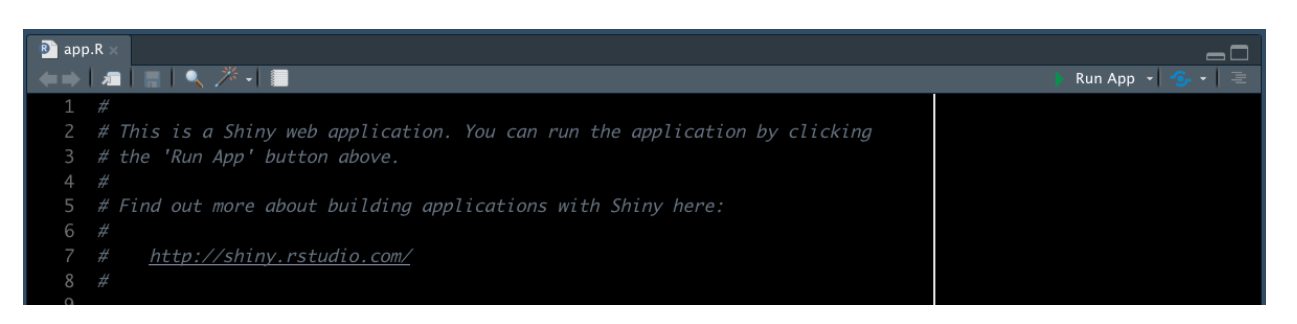

If may prefer to take a more code-oriented approach to running the app, then we may type

`runApp("example")`

to perform the same function. Note that the string we pass into the [`runApp()` function](https://shiny.rstudio.com/reference/shiny/1.5.0/runApp.html) should be the name of the app that we specified when we first created the code files. Recall that we named the app `example`, which created a folder that contains `app.R`. Given a string, the `runApp()` function looks for the folder matching this string to find `app.R`.

The current code in `app.R` results in the following interface:

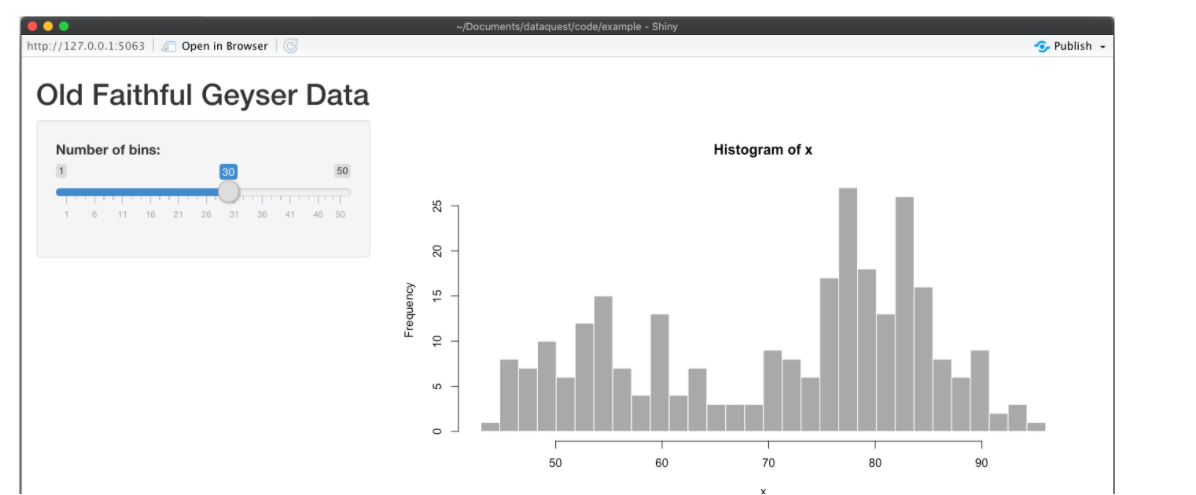

The app consists of a sliding input that ranges from 1 to 50 and a histogram. As we change the value in the sliding input, the histogram will change according to the value in the sliding input. The sliding input changes the number of bins that show up on the histogram. This small app shows the gist of what we can do in Shiny: provide inputs to a user, which can change what they see on the interface.

If we inspect the RStudio console, we'll see the following:

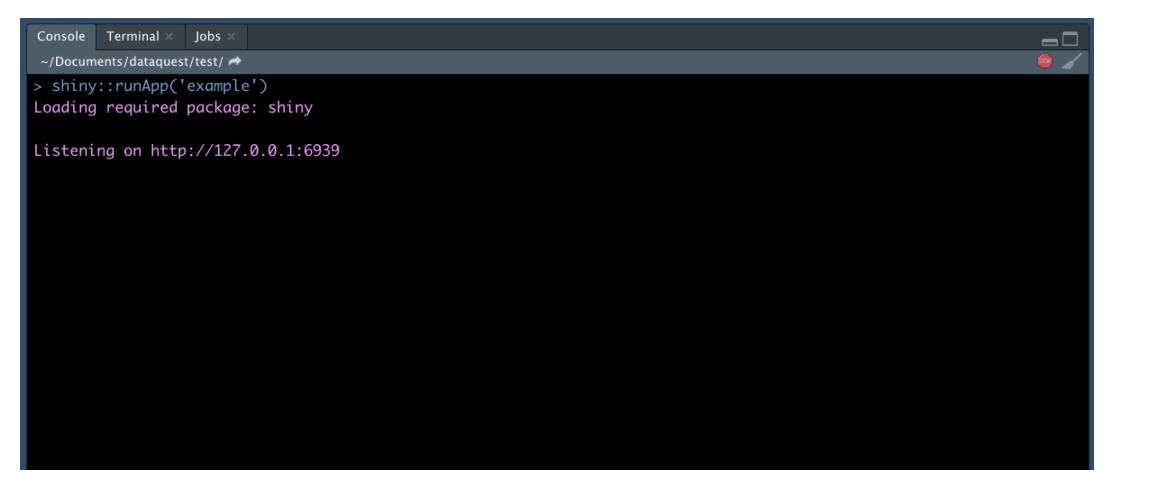

There are two main takeaways from this picture. 

1. The first is that our RStudio session is actually running the app locally on our machine. By "locally," we mean that no one else can see the app except for us. If we take the URL listed on the console and enter it into a browser, we'll see the same app! Our computer is acting as a server to the app. We'll explain this later, but the detail is important.

2. Since RStudio is running a server, the second takeaway is that **we won't be able to run any code in the console while the app is up**. If we try, the console won't unrespond to any code. It will only run the code after we close the window containing the Shiny app.

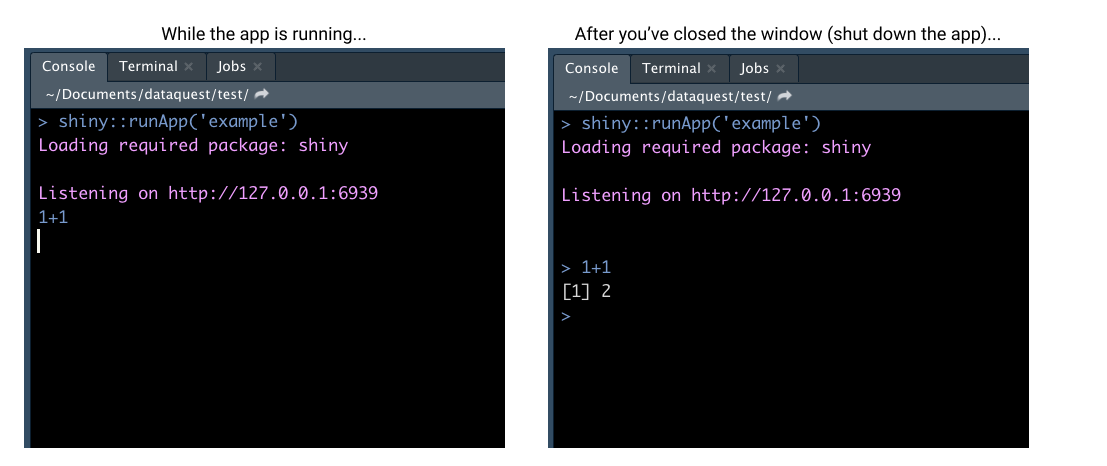

Now that we've had a good look at the app, it's time to see how the code lines up with what we've seen.

### Instructions:

1. Run the app, and take a little bit of time to experiment with it. Note how the plot changes in response to changes in the input.

Above, we ran the example app we created with the new Shiny app using RStudio. Now we'll carefully explore the code's organization and how it relates to what we see in the interface.

Let's look at the first half of `app.R`.

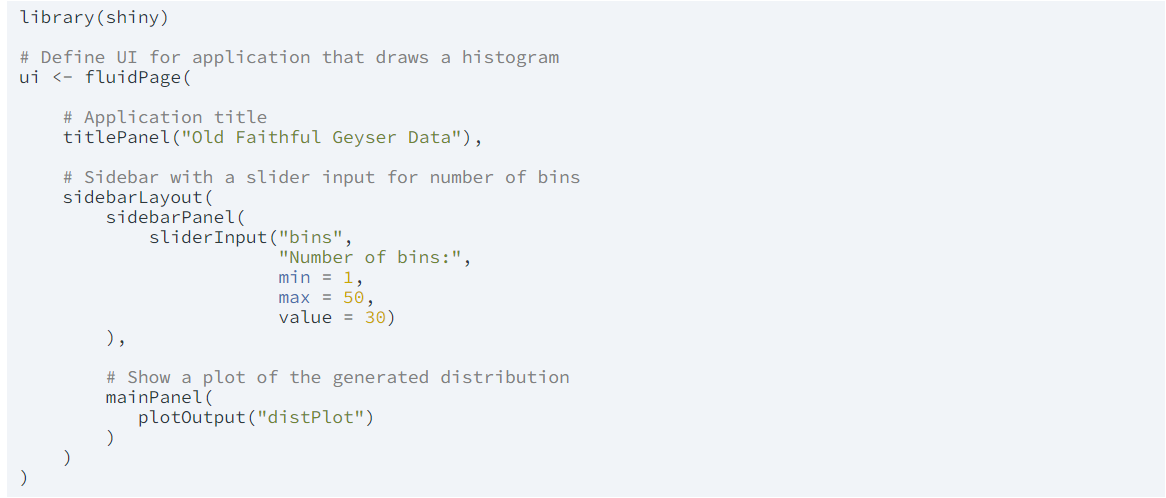

To start creating the app, we need to bring in the Shiny library, so that's why `library(shiny)` is the first line of code in the app. The next bit of code is a variable that constructs the interface. By convention, the interface code is usually stored as `ui`, short for "user interface." Shiny code for an interface can become complicated quickly because it is highly nested. For this reason, we highly recommend commenting in our user interface code to remind ourself what the code is doing.

Below, is a side-by-side comparison of the interface and the code that produces it:

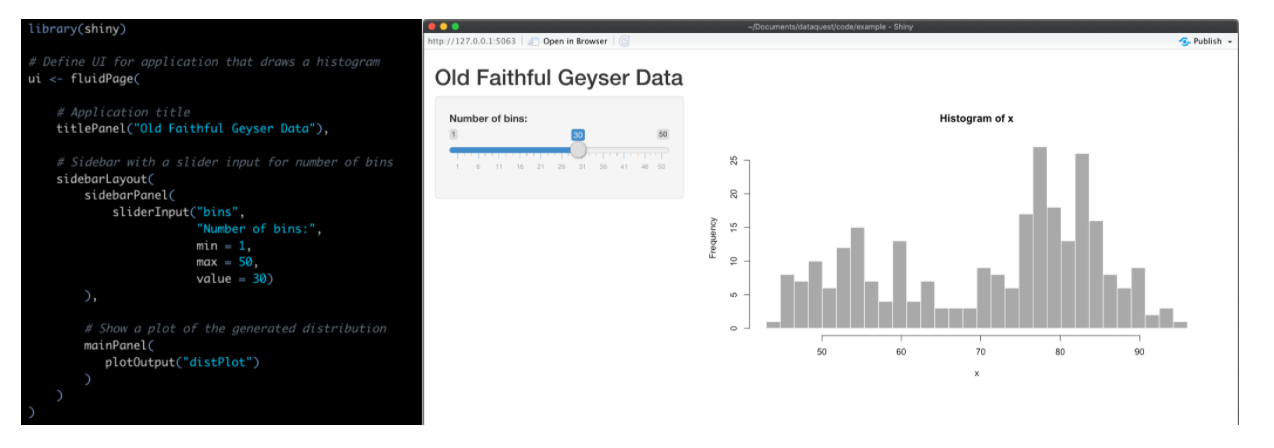

The user interface code has a nested structure, so we'll start from the outermost layer and move inward. `shiny` gives us a variety of functions that allow us to create a user interface without worrying about HTML or CSS. We'll explain why later, but it's important to know that each of the functions we'll see serves to display one part of the interface.

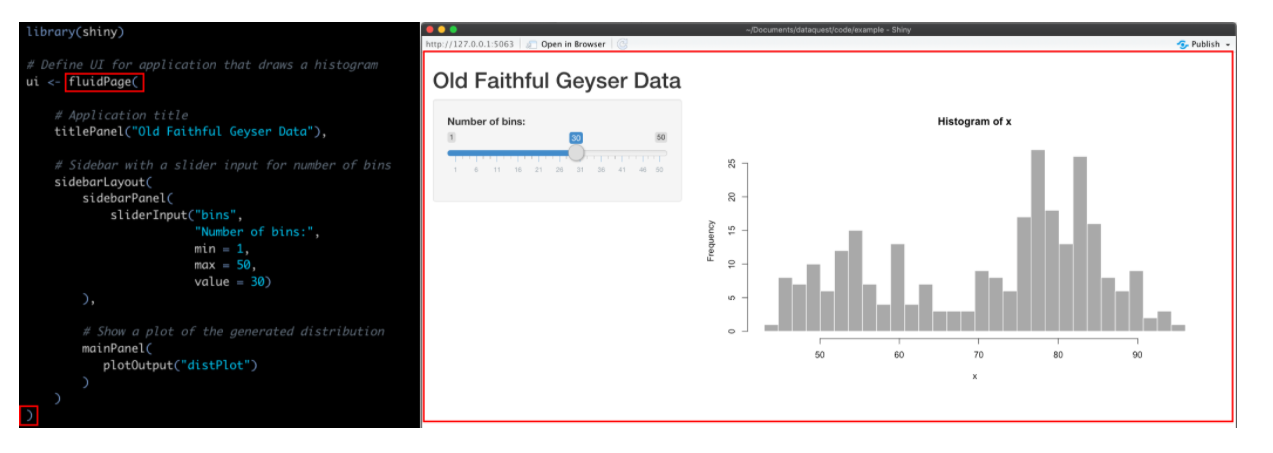

The first layer of the `ui` variable is a [function called `fluidPage()`](https://shiny.rstudio.com/reference/shiny/1.5.0/fluidPage.html). `fluidPage()` is part of a family of functions that allow us to establish an entire web page, which is why we've highlighted the entire page. We'll learn another important type of page later, but `fluidPage()` serves us well for now. The "fluid" aspect of `fluidPage()` refers to the fact that the items on the page will rearrange themselves to fit the dimensions of the window. When creating a user interface, a page-related function is the first one to use.

After defining the page function, we can start looking at each of the elements inside `fluidPage()`. These interior elements are what make up the interface itself.

Above, we looked at the example app and started to walk through the pre-made code. The first thing we saw was a `fluidPage()` function that encapsulates all of the interface. Now we'll look at each of the interface elements.

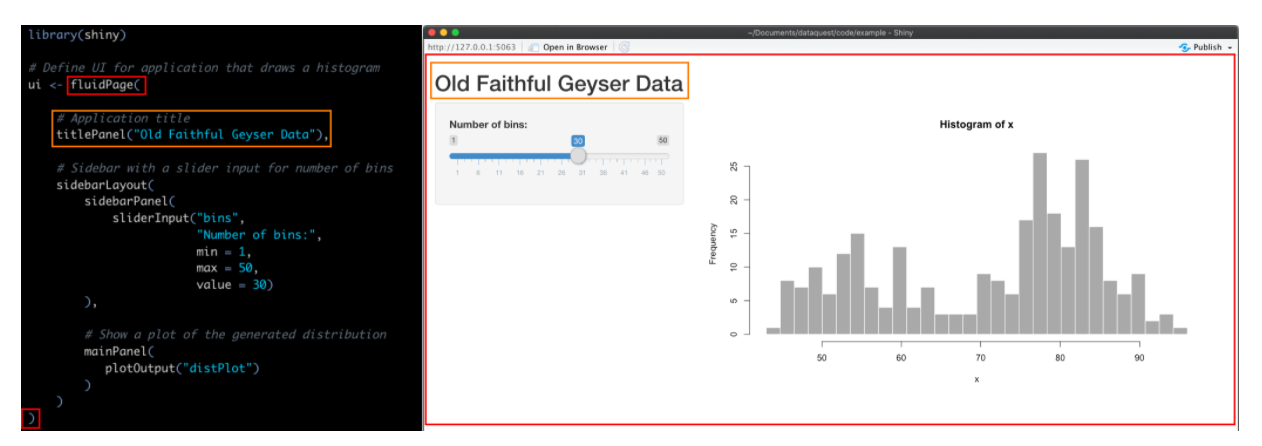

The first item we see inside `fluidPage()` is the [`titlePanel()` function](https://shiny.rstudio.com/reference/shiny/1.5.0/titlePanel.html). The `titlePanel()` takes in a string and displays it in bold in the app. Often, web apps will have catchy names, so `titlePanel()` makes sure a user immediately knows what the app is. A `titlePanel()` isn't always necessary, but it helps make the app more informative.

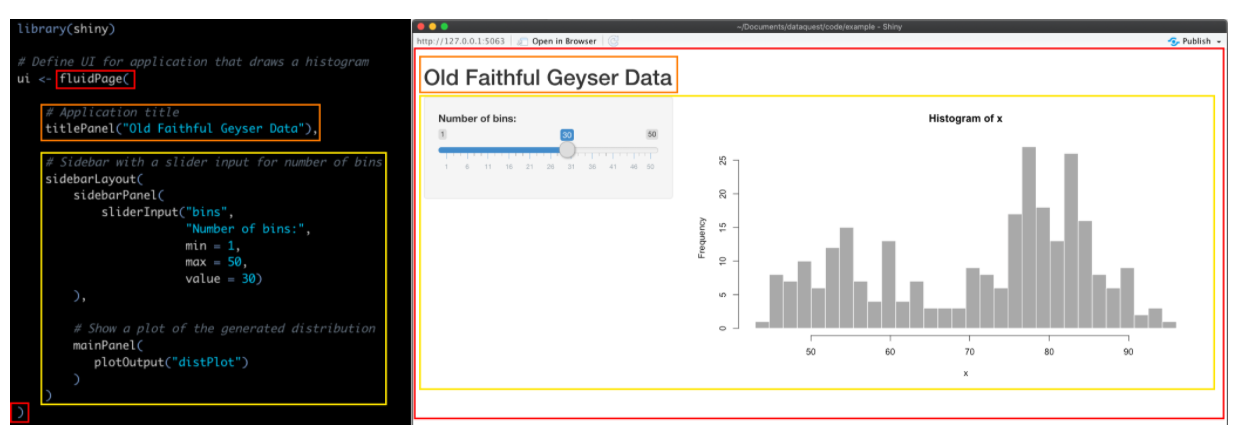

The next section of the app is the [`sidebarLayout()` function](https://shiny.rstudio.com/reference/shiny/1.5.0/sidebarLayout.html). `sidebarLayout()` is one of several functions that help a user organize the contents within the page. As the name suggests, this layout divides the page into a sidebar and a main panel. The side panel houses the inputs, while the main panel displays the plot. As with pages, there are several layout types we can use. For the curious, we can look at the Shiny [`reference`](https://shiny.rstudio.com/reference/shiny/1.5.0/) under the UI Layout section to explore more.

Within `sidebarLayout()`, we can see two other functions nested within it: `sidebarPanel()` and `mainPanel()`. These two functions are designed to use with `sidebarLayout()`. In this app, `sidebarPanel()` precedes `mainPanel()`, which we can see here.

While we cannot cover all of the possible page and layout types, we encourage to explore the other functions. One great aspect about Shiny is that it forms a quick feedback loop for iteration. For example, if we want to experiment with `flowLayout()` or `splitLayout()`, we can substitute these functions into the app, run it and see how it looks.

Finally, we see that there is just one line of code in the `mainPanel()`. This one line is the `plotOutput()` function, with a single string in it (`"distPlot"`). This may seem oddly bare, but we'll explain this line of code later. What's important to know is that this line of code produces the histogram plot on the interface.

We've drilled down through the interface and reached a core aspect of a Shiny app: **the inputs**.

Inputs (also known as "widgets") are a part of what makes Shiny so useful to programmers: they allow a user to interact with the app in a way that's not possible with regular web pages. User interaction creates a more satisfying experience that data analysts can take advantage of in their personal projects. Given their importance, we've dedicated a screen to dissecting the lone sliding input in the example app.

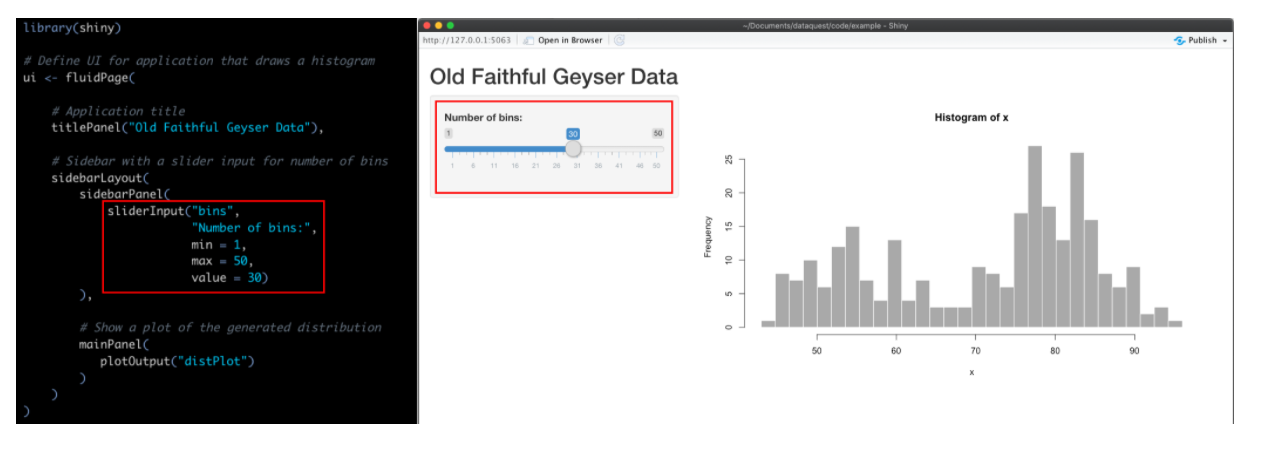

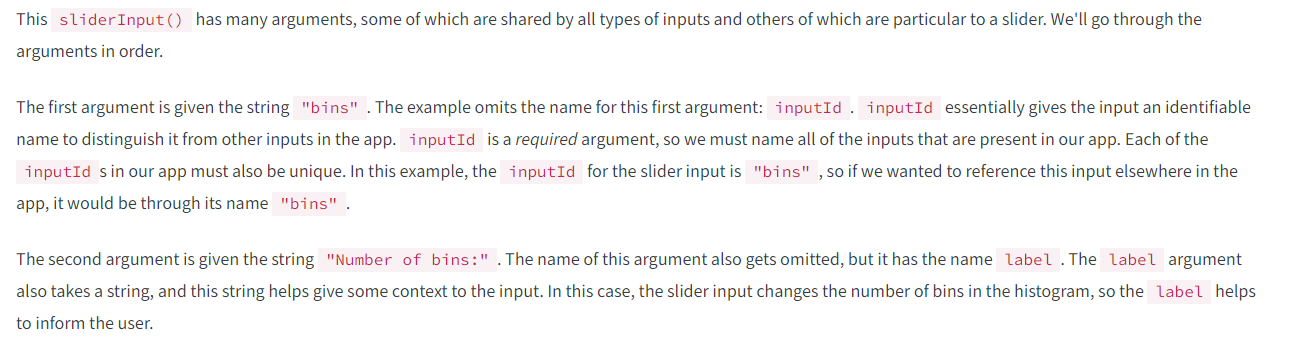

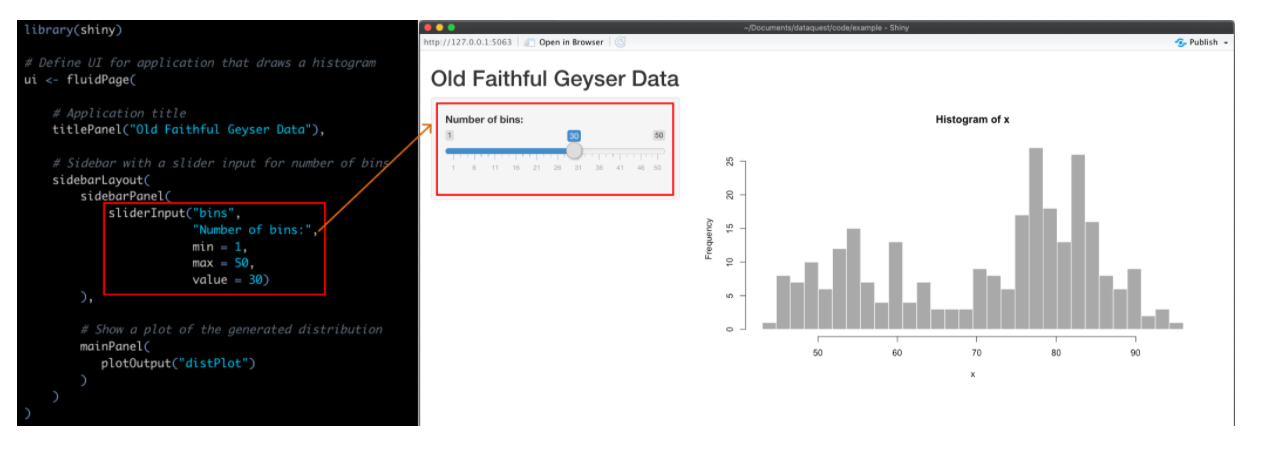

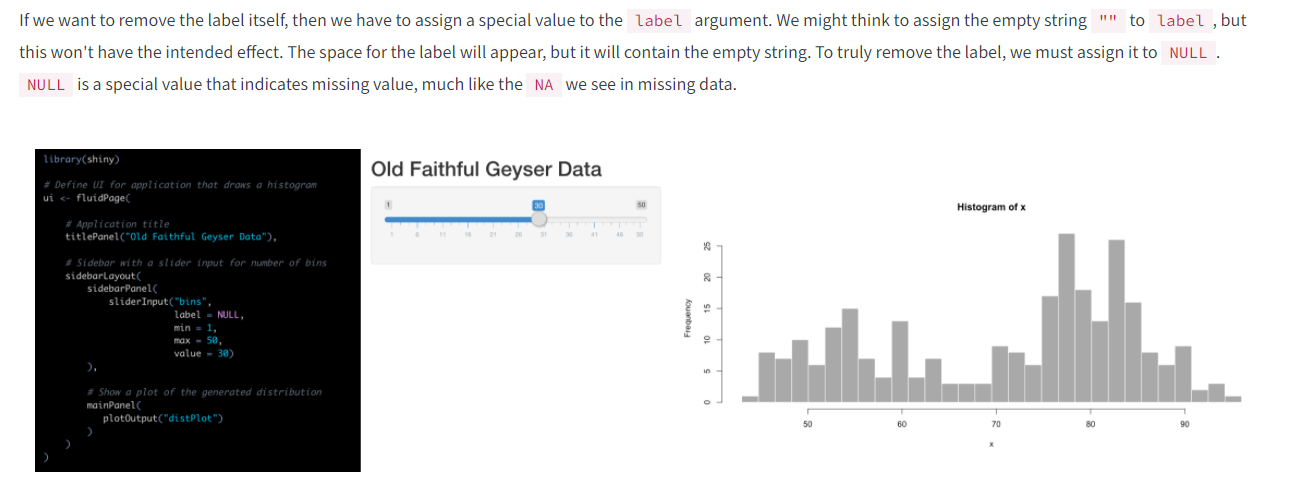

The next three inputs are specific to the `sliderInput()`, and they help define the constraints on the input itself. The `min` and `max` arguments define the lower and upper limits that the slider can reach. The `value` argument defines the initial value of the slider when we first run the app.

In reality, `sliderInput()` has many more arguments that we can experiment with, but most of them have default settings. We can type `?sliderInput` into the RStudio console to see the other arguments, but we've already covered the major ones.

Everything we've covered so far looks at the structure of `sliderInput()`. The other inputs have similar structures, so it becomes a matter of learning the arguments for each input. Thankfully, the Shiny documentation makes learning them accessible. [Here](https://shiny.rstudio.com/gallery/widget-gallery.html) is a gallery of the native inputs in Shiny. It's worth taking some time to see what's available since we'll be using the inputs later.

We may wonder where the actual value associated with the slider input is. Users don't deal with any programming — they only use a slider and a plot that reacts to the slider. This is by design. The programmer should be in charge of designing the interface and how changing inputs changes the interface. We'll see that the slider value gets used in the other half of the code: the server code.

### Instructions:

1. Experiment with the arguments of `sliderInput()` to see how the changes affect the app. Here are some things to try:
    * What happens when we set `min` to a negative number? Does the result line up with what we might expect?
    * What happens when we set `value` to a number outside the range of `min` and `max`? Do either of these experiments cause the app to break down?

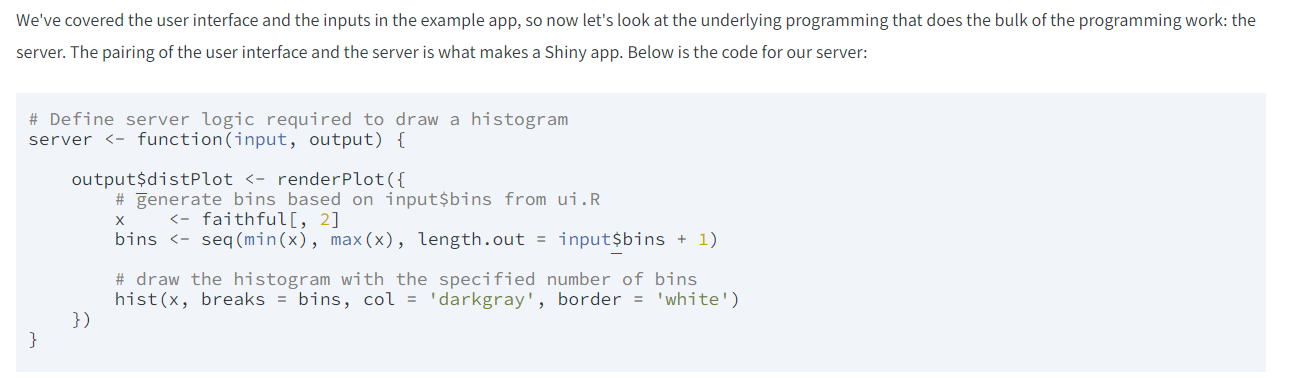

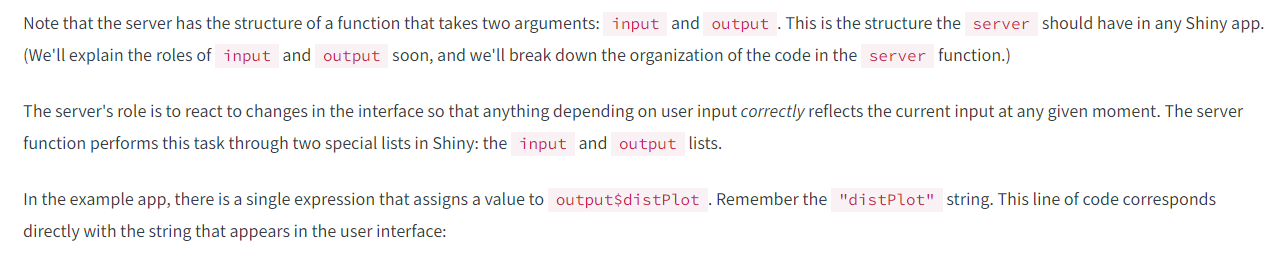

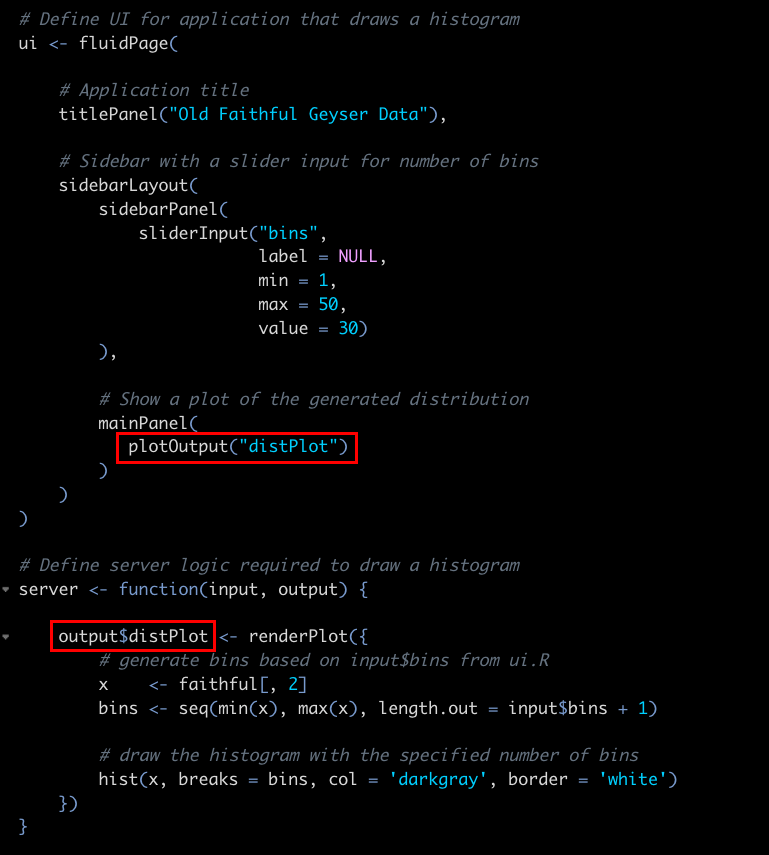

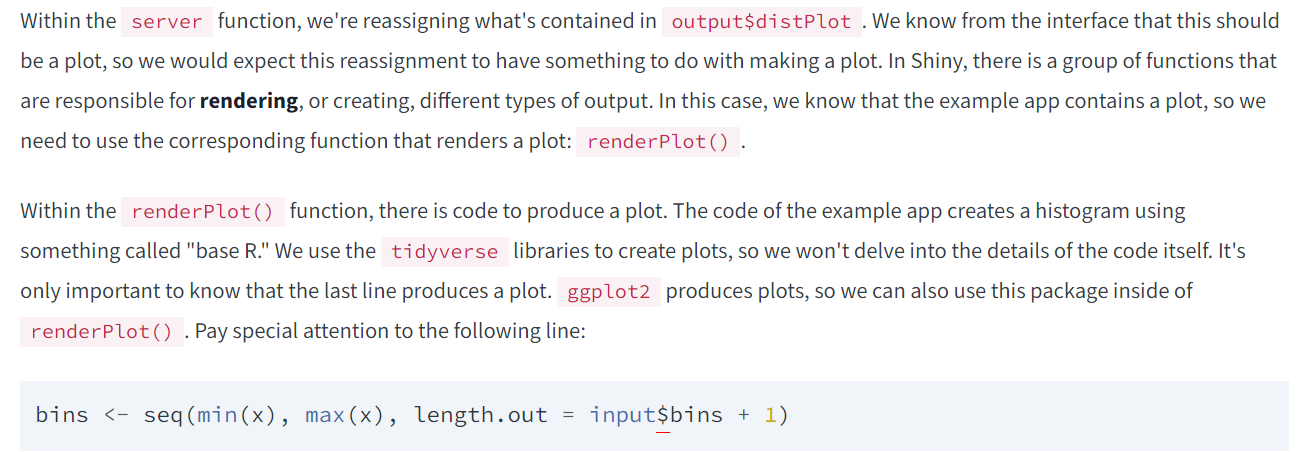

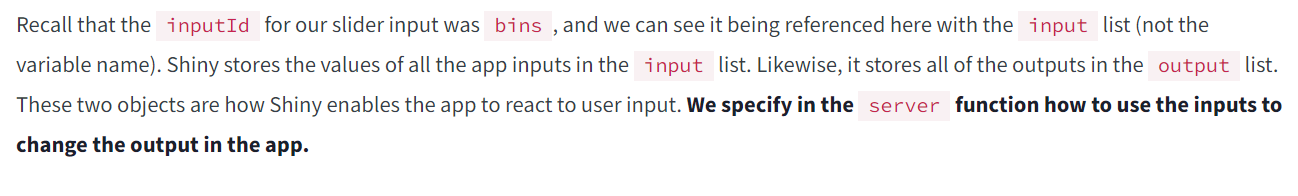

All of these Shiny functions can be difficult to juggle when we're getting started. We'll go over the details of how Shiny uses the `ui` and `server` together to create a working app.

Now we'll go over using an input to produce an output. This process is essential to programming with Shiny. We'll discuss what happens when we try to run the app since it's a great example of this process.

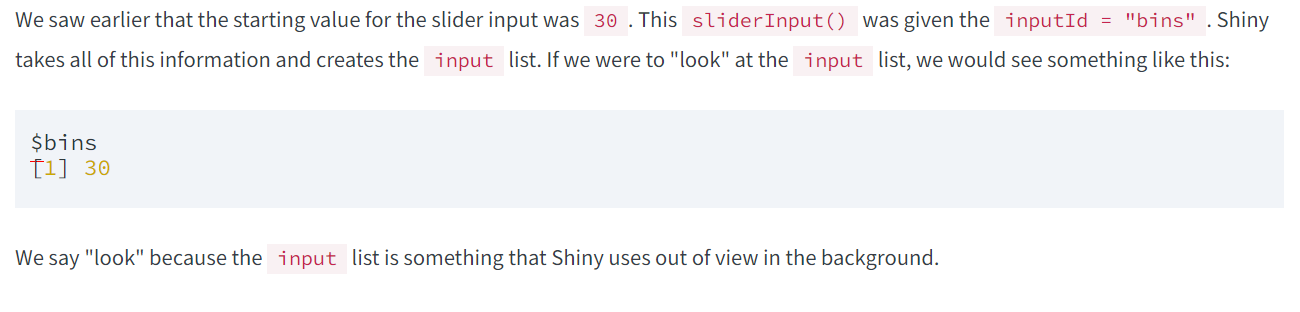

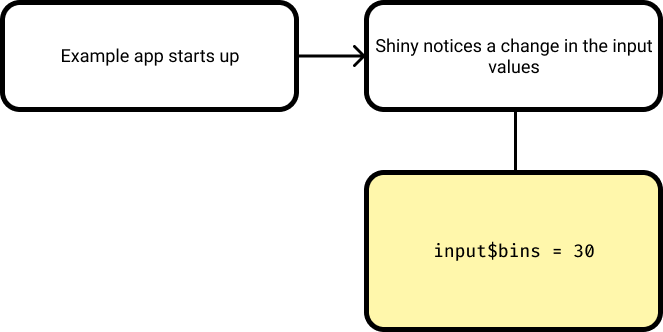

After establishing the values for the inputs, Shiny uses these values to produce the parts of the interface that depend on them. In this case, the histogram depends on the `sliderInput()`, so it needs to know its value.

Within the `server` function, we see that the `input$bins` value creates the `output$distPlot` plot. Shiny requires the correct rendering function, so we use the `renderPlot()` function to produce the plot for the `output` list.

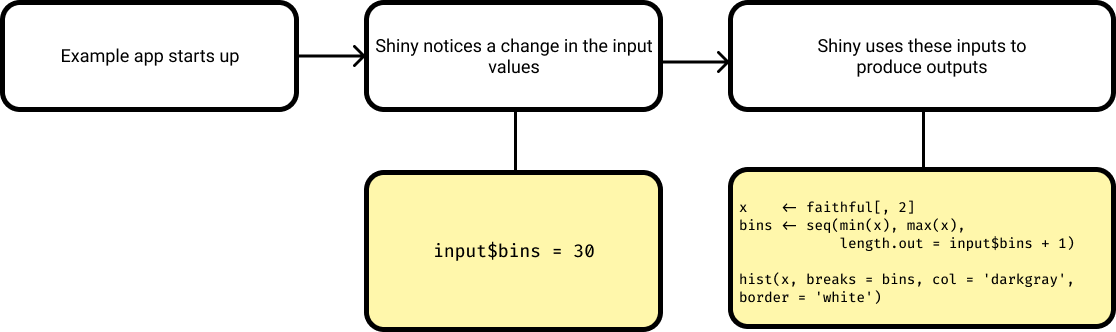

After the plot is created, it is stored within the `output` list under the `distPlot` field. Let's have another look at the user interface code to see where this field is being used:

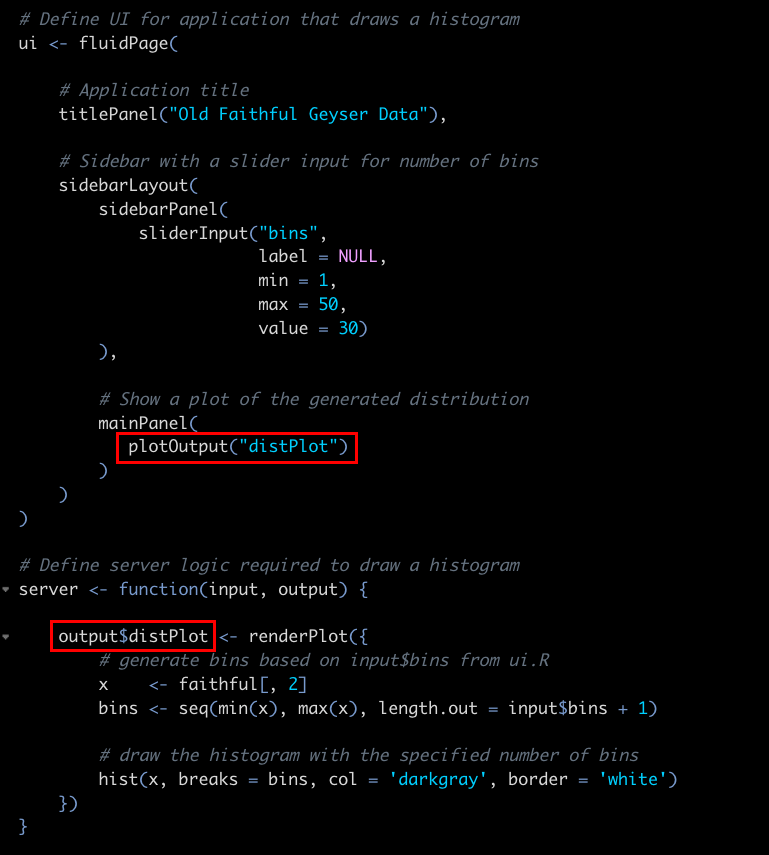

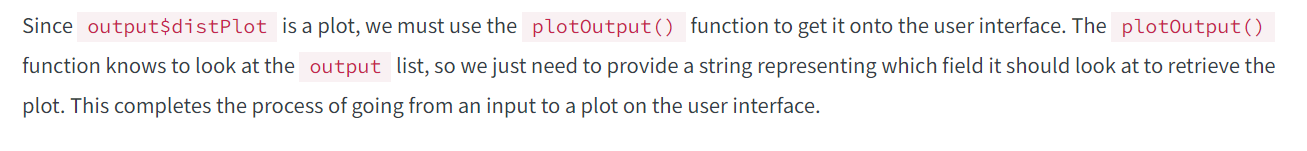

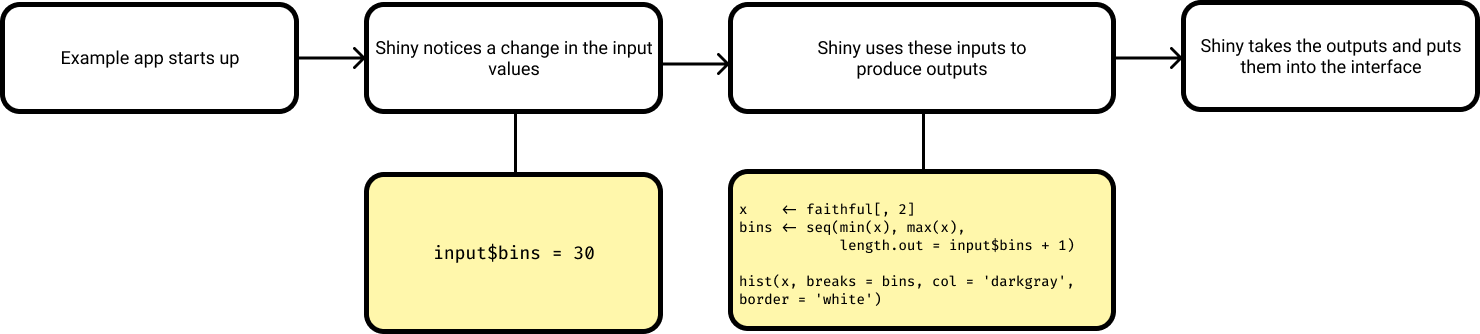

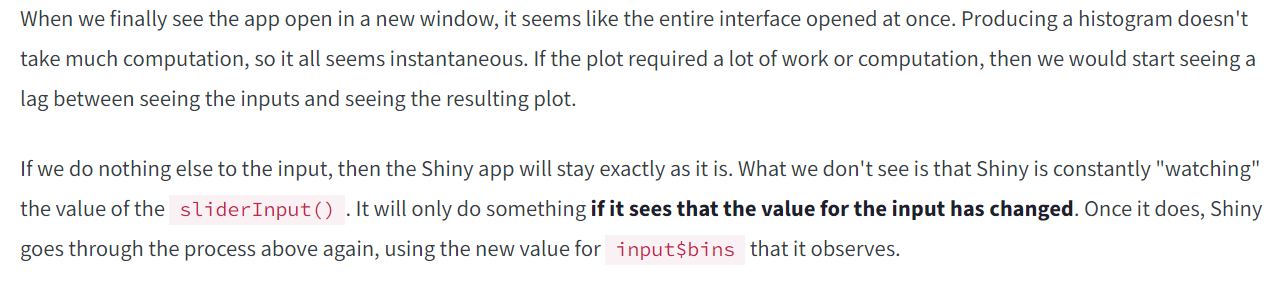

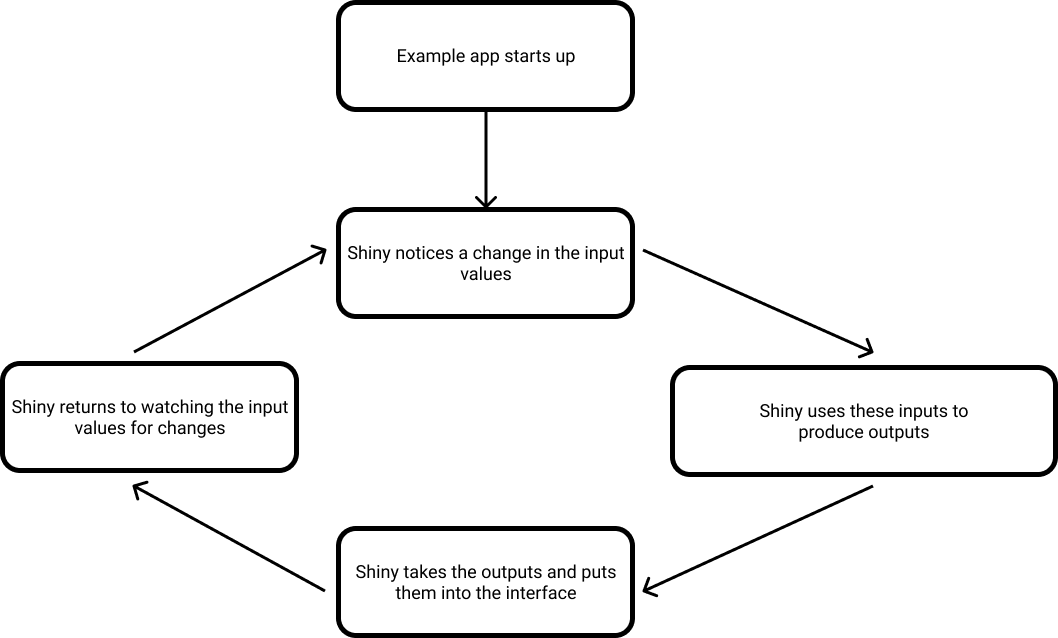

This cycle is the same with any type of input in Shiny. Once Shiny notices an input change, it will change all of the outputs associated with it, and it will change the interface accordingly. It's important to remember this cycle as we progress through and develop our own apps.

In this file, we took our first look at the Shiny package, and we spent some time exploring an example app. This app only has one input and one output, but it offers some useful insights into how Shiny works. In Shiny, different parts of the interface react to changes in input that a user can specify, distinguishing it from how we've typically programmed before in the R Data Analyst Path.

In the next file, we'll plan out our first app and begin programming it. We'll start with the inputs and then move to the server logic. Afterward, we'll discuss some ways that we can take our Shiny apps further. 